# Tools

In [1]:
import pandas as pd
import numpy as np
import os
#direct=pd.merge(data.sum(),data.std(), on=['Nb','Freq'])

In [2]:
globaldir='dataset1/'
namelist=["Nb", "tps1", "tmps2", "Perf", "Freq", "Values", "Names", "Rapl", "Server"]

In [3]:
def read_file(basename, directory=globaldir, names=None, fillna='None'):
    res = []
    for filename in os.listdir(directory):
        if os.path.isfile(directory+filename) and filename.startswith(basename):
            local_value = pd.read_csv(directory+filename, sep=' ', names=names)
            res.append(local_value)
    result = pd.concat(res)
    result.fillna(fillna, inplace=True)
    return result

In [4]:
def precision_graph(dataframe, pmc_name, key_field, title, xlabel, ylabel):
    temp=[]
    if type(key_field)==str:
        key_field_tab=[key_field]
        cols = [key_field, "Values"]
    else:
        key_field_tab = key_field
        cols = key_field+["Values"]
    for (index, data) in dataframe.iterrows():
        try:
            pos = data['Names'].split(',').index(pmc_name)
            val = data['Values'].split(',')[pos]
            v = data.tolist()
            temp.append([int(data[elem]) for elem in key_field_tab]+[float(val)])
        except:
            continue
    data = pd.DataFrame(temp, columns=cols).groupby(key_field_tab)
    p = data.mean().plot(figsize=(10*len(key_field_tab),5),legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=data.std());
    p.set_title(title, fontsize=16);
    p.set_xlabel(xlabel, fontsize=14);
    p.set_ylabel(ylabel, fontsize=14);

In [5]:
def perf_graph(dataframe, key_field, y, title, xlabel, ylabel):
    if type(key_field)==str:
        key_field_tab=[key_field]
    else:
        key_field_tab = key_field
    data=dataframe.groupby(key_field_tab)
    p = data[y].mean().plot(figsize=(10*len(key_field_tab),5),legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=data.std());
    p.set_title(title, fontsize=18);
    p.set_xlabel(xlabel, fontsize=18);
    p.set_ylabel(ylabel, fontsize=18);


In [6]:
def most_frequent(data, name):
    return data[name].value_counts().idxmax()


# Overhead

## Hardware

In [7]:
hw = read_file("output_precision_hw_res_file",names=namelist)

In [8]:
perf_graph(hw, ['Rapl', 'Nb'], 'Perf', "Impact on overhead of number of monitored Hardware PC",
          "Number of Hardware performance counters", "Time (nanoseconds)")

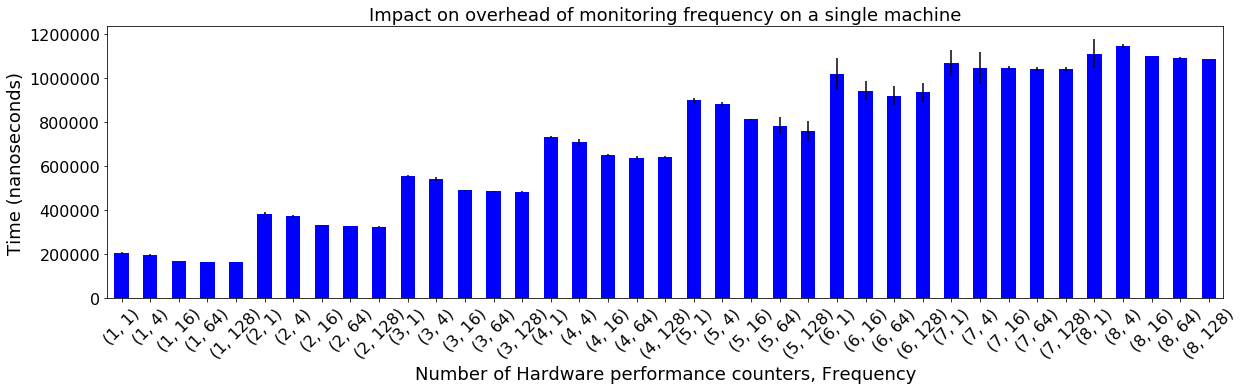

In [9]:
perf_graph(hw[(hw.Server == most_frequent(hw, 'Server')) & (hw.Rapl == 'rapl_false')], ['Nb','Freq'], 'Perf', "Impact on overhead of monitoring frequency on a single machine",
          "Number of Hardware performance counters, Frequency", "Time (nanoseconds)")

## Software

In [10]:
sw = read_file("output_precision_sw_res_file",names=namelist)

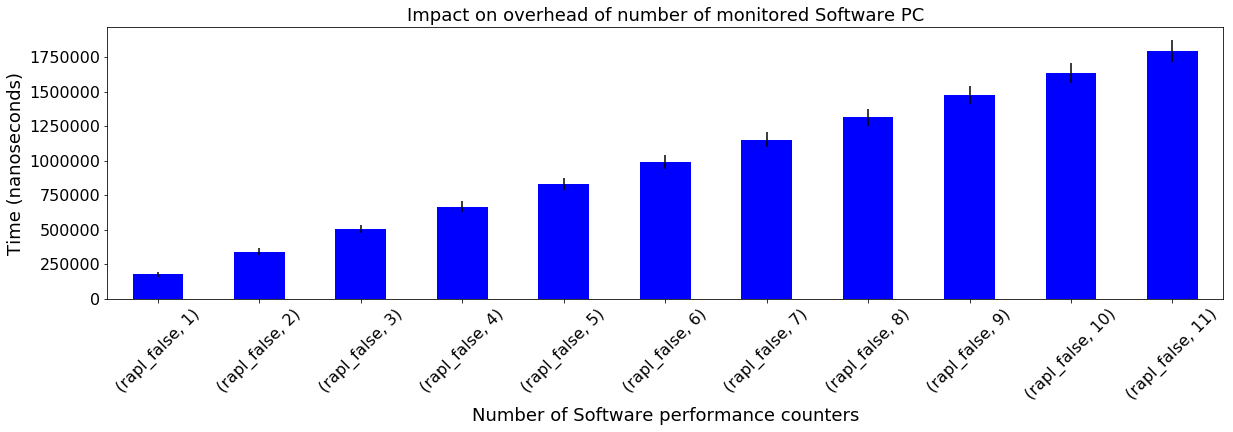

In [11]:
perf_graph(sw, ['Rapl', 'Nb'], 'Perf', "Impact on overhead of number of monitored Software PC",
          "Number of Software performance counters", "Time (nanoseconds)")

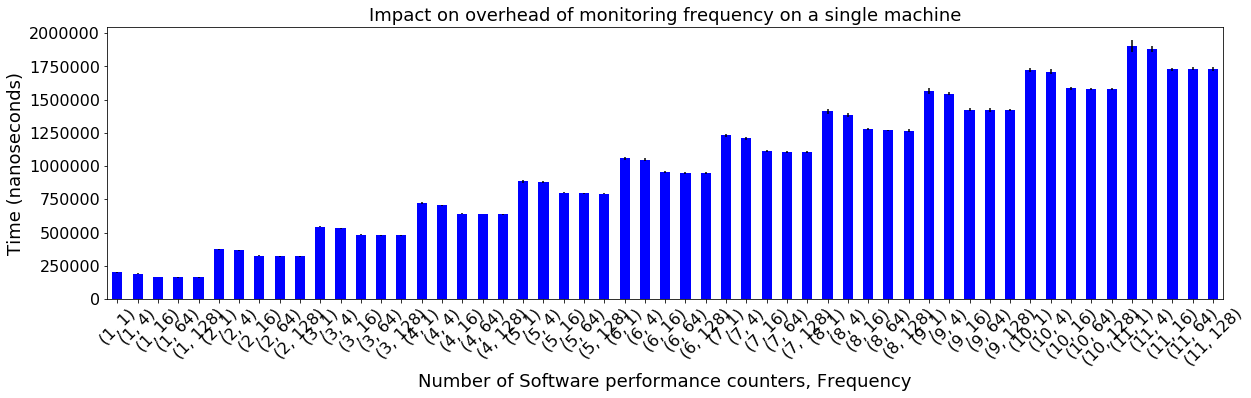

In [12]:
perf_graph(sw[(sw.Server == most_frequent(sw, 'Server')) & (sw.Rapl == 'rapl_false')], ['Nb','Freq'], 'Perf',
            "Impact on overhead of monitoring frequency on a single machine",
            "Number of Software performance counters, Frequency", "Time (nanoseconds)")


## Hw Cache

In [13]:
hw_cache = read_file("output_precision_hw_cache_res_file",names=namelist)

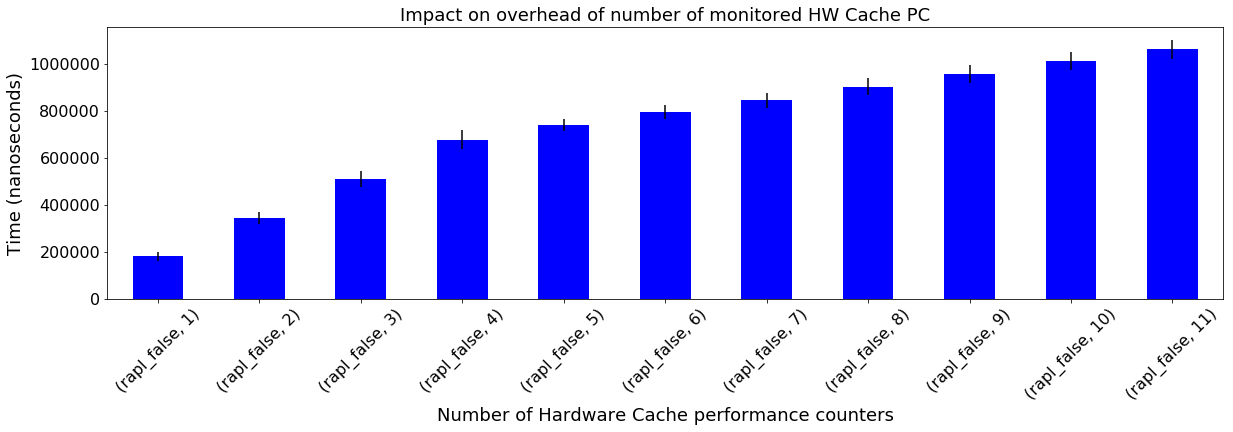

In [14]:
perf_graph(hw_cache, ['Rapl', 'Nb'], 'Perf', "Impact on overhead of number of monitored HW Cache PC",
          "Number of Hardware Cache performance counters", "Time (nanoseconds)")

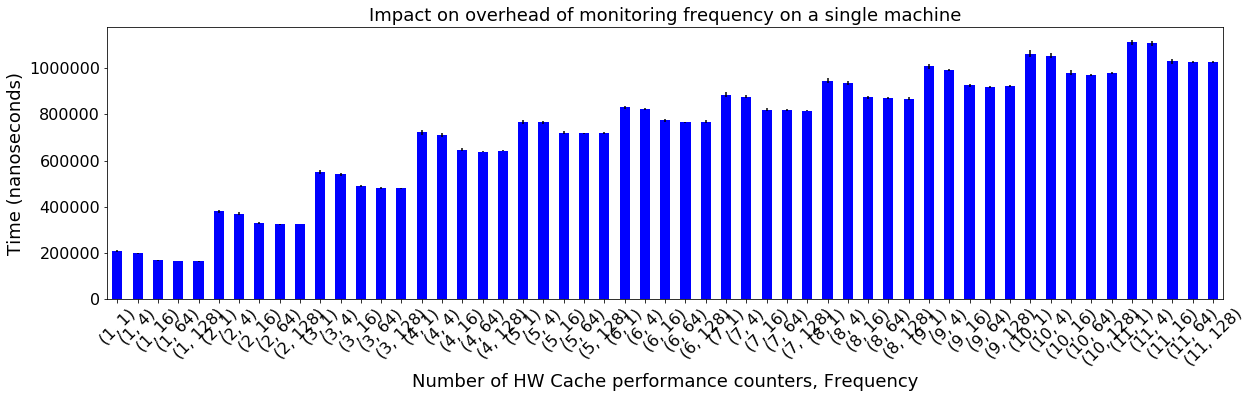

In [15]:
perf_graph(hw_cache[(hw_cache.Server == most_frequent(hw_cache, 'Server')) & (hw_cache.Rapl == 'rapl_false')], ['Nb','Freq'], 'Perf',
           "Impact on overhead of monitoring frequency on a single machine",
           "Number of HW Cache performance counters, Frequency", "Time (nanoseconds)")

## All hardware

In [16]:
hw_all = read_file("output_precision_hw_all_res_file",names=namelist)

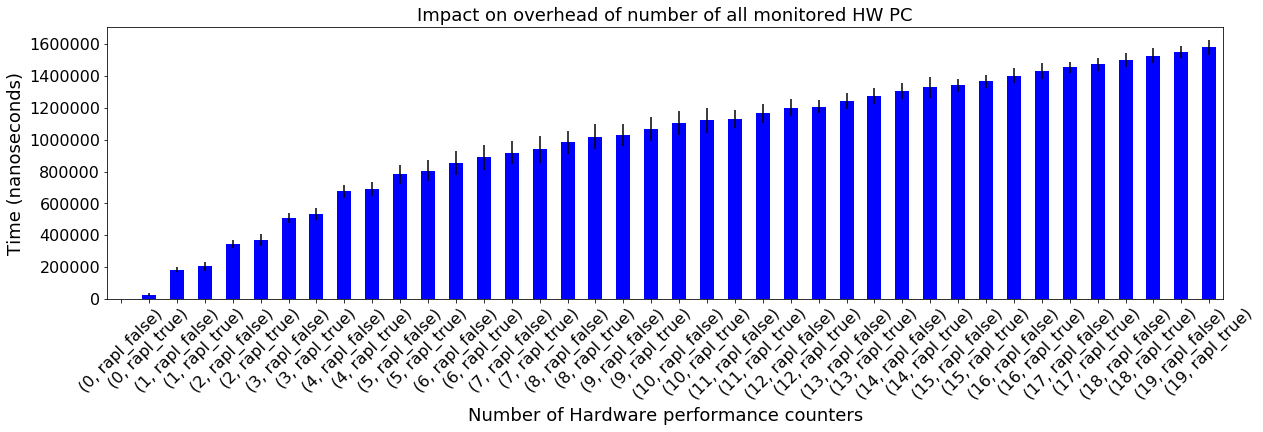

In [17]:
perf_graph(hw_all, ['Nb', 'Rapl'], 'Perf', "Impact on overhead of number of all monitored HW PC",
          "Number of Hardware performance counters", "Time (nanoseconds)")

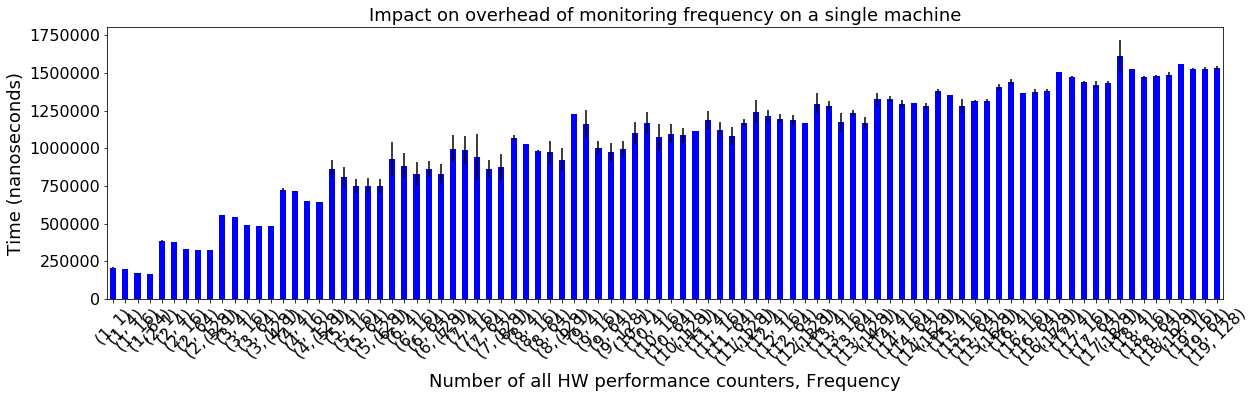

In [18]:
perf_graph(hw_all[(hw_all.Server == most_frequent(hw_all, 'Server')) & (hw_all.Rapl == 'rapl_false')], ['Nb','Freq'], 'Perf',
           "Impact on overhead of monitoring frequency on a single machine",
           "Number of all HW performance counters, Frequency", "Time (nanoseconds)")

# Precision

## Hardware

In [19]:
pre_hw = read_file("output_precision_hw_res_file", names=namelist)

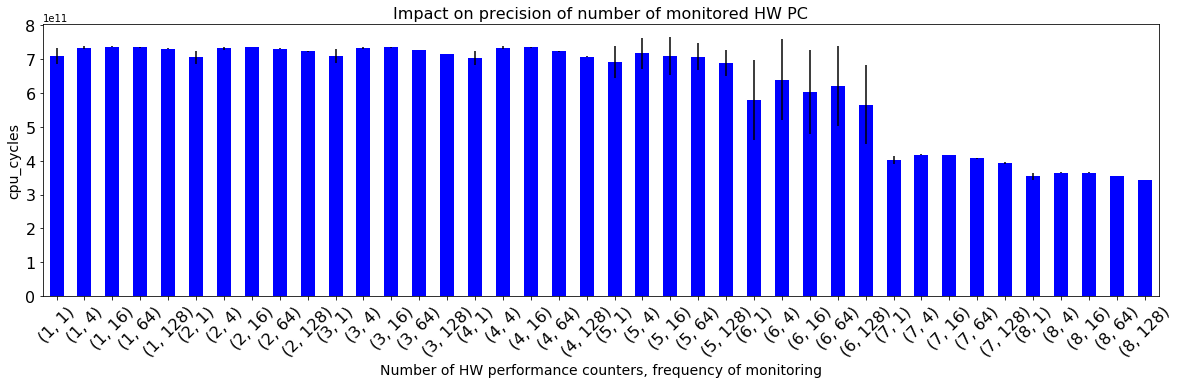

In [20]:
precision_graph(pre_hw[pre_hw.Rapl=='rapl_false'], 'cpu_cycles', ['Nb', 'Freq'],
      "Impact on precision of number of monitored HW PC",
      "Number of HW performance counters, frequency of monitoring", "cpu_cycles")

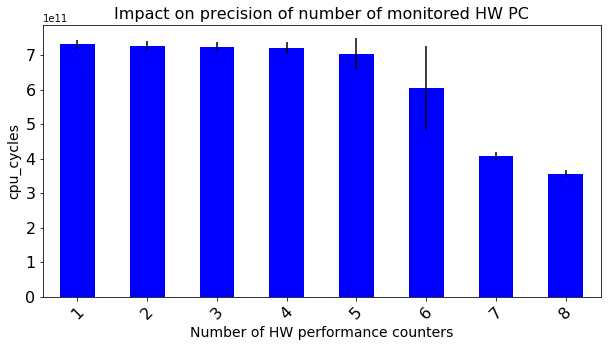

In [21]:
precision_graph(pre_hw[pre_hw.Rapl=='rapl_false'], 'cpu_cycles', 'Nb',
      "Impact on precision of number of monitored HW PC",
      "Number of HW performance counters", "cpu_cycles")

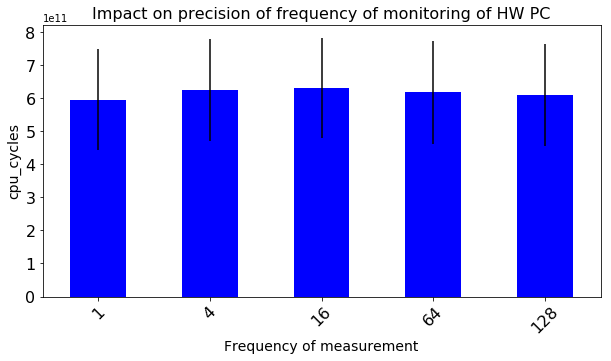

In [22]:
precision_graph(pre_hw[pre_hw.Rapl=='rapl_false'], 'cpu_cycles', 'Freq',  
      "Impact on precision of frequency of monitoring of HW PC",
     "Frequency of measurement", "cpu_cycles")

## Software

In [23]:
pre_sw = read_file("output_precision_sw_res_file", names=namelist)

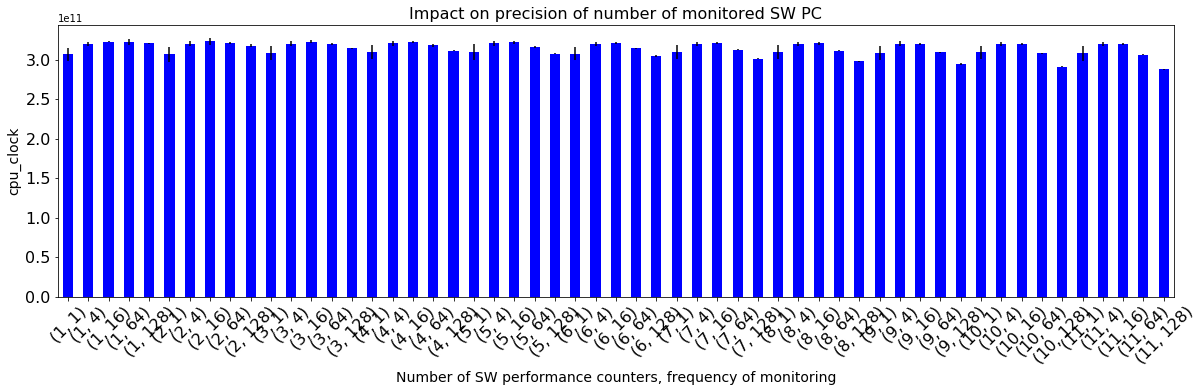

In [24]:
precision_graph(pre_sw[pre_sw.Rapl=='rapl_false'], 'cpu_clock', ['Nb', 'Freq'],
      "Impact on precision of number of monitored SW PC",
      "Number of SW performance counters, frequency of monitoring", "cpu_clock")

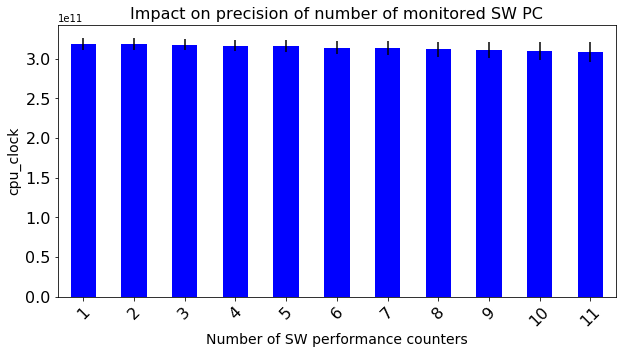

In [25]:
precision_graph(pre_sw[pre_sw.Rapl=='rapl_false'], 'cpu_clock', 'Nb',
      "Impact on precision of number of monitored SW PC",
      "Number of SW performance counters", "cpu_clock")

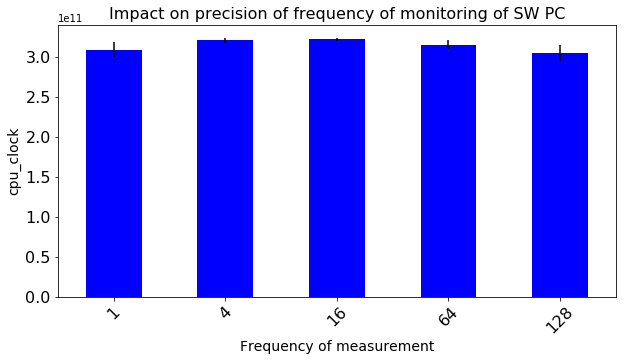

In [26]:
precision_graph(pre_sw[pre_sw.Rapl=='rapl_false'], 'cpu_clock', 'Freq',  
      "Impact on precision of frequency of monitoring of SW PC",
     "Frequency of measurement", "cpu_clock")

## HW Cache

In [27]:
pre_hw_cache = read_file("output_precision_hw_cache_res_file", names=namelist)

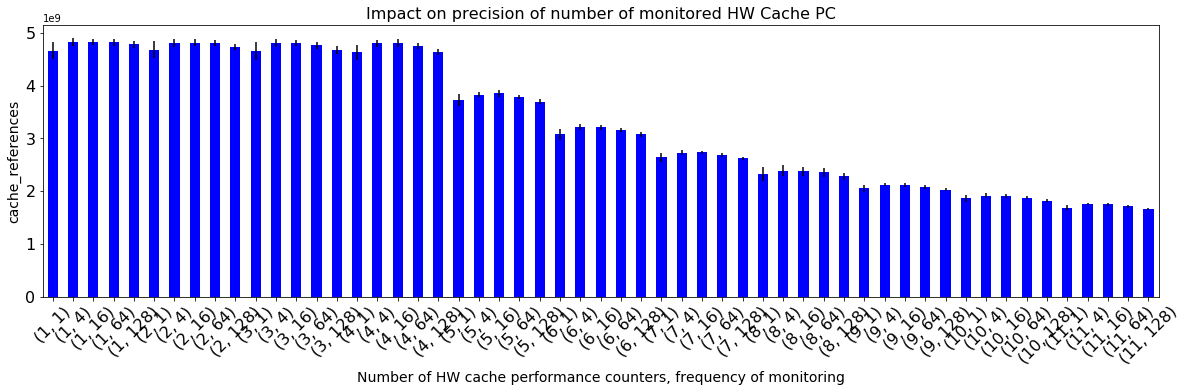

In [28]:
precision_graph(pre_hw_cache[pre_hw_cache.Rapl=='rapl_false'], 'cache_references', ['Nb', 'Freq'],
      "Impact on precision of number of monitored HW Cache PC",
      "Number of HW cache performance counters, frequency of monitoring", "cache_references")

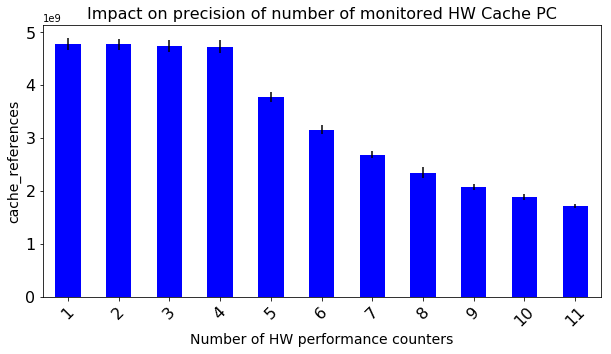

In [29]:
precision_graph(pre_hw_cache[pre_hw_cache.Rapl=='rapl_false'], 'cache_references', 'Nb',
      "Impact on precision of number of monitored HW Cache PC",
      "Number of HW performance counters", "cache_references")

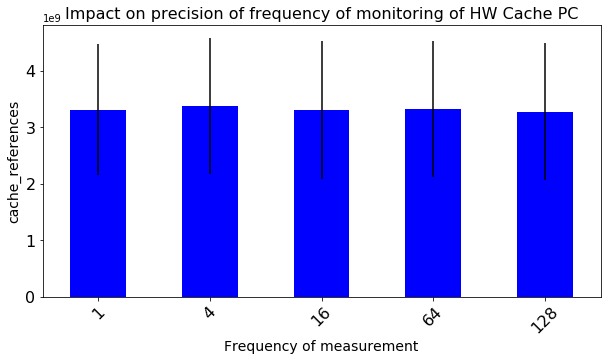

In [30]:
precision_graph(pre_hw_cache[pre_hw_cache.Rapl=='rapl_false'], 'cache_references', 'Freq',  
      "Impact on precision of frequency of monitoring of HW Cache PC",
     "Frequency of measurement", "cache_references")

## All HW

In [31]:
pre_hw_all = read_file("output_precision_hw_all_res_file", names=namelist)

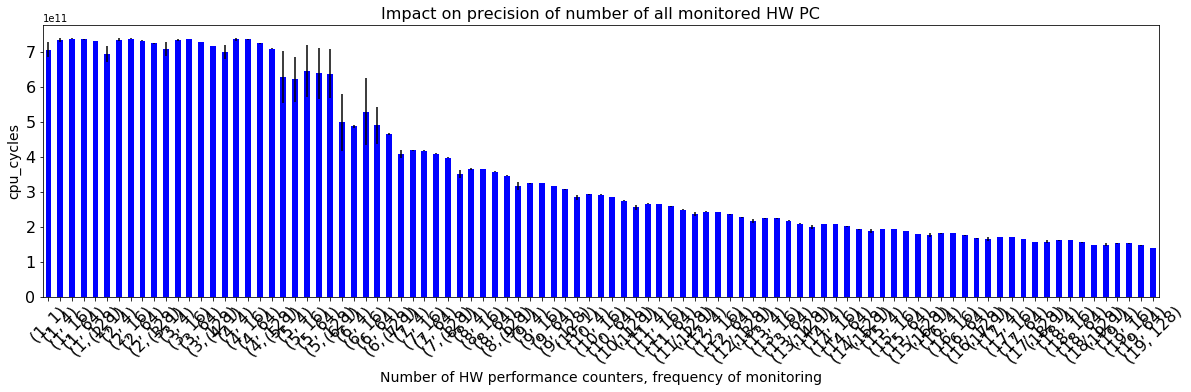

In [32]:
precision_graph(pre_hw_all[pre_hw_all.Rapl=='rapl_false'], 'cpu_cycles', ['Nb', 'Freq'],
      "Impact on precision of number of all monitored HW PC",
      "Number of HW performance counters, frequency of monitoring", "cpu_cycles")

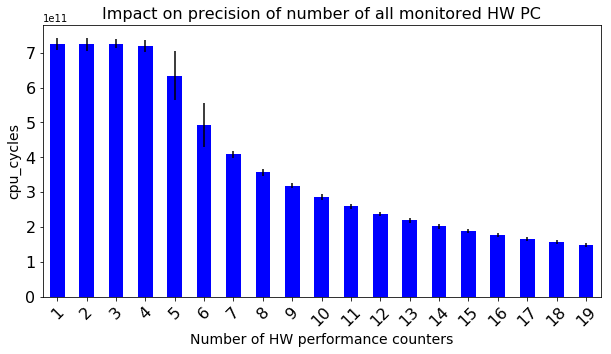

In [33]:
precision_graph(pre_hw_all[pre_hw_all.Rapl=='rapl_false'], 'cpu_cycles', 'Nb',
      "Impact on precision of number of all monitored HW PC",
      "Number of HW performance counters", "cpu_cycles")

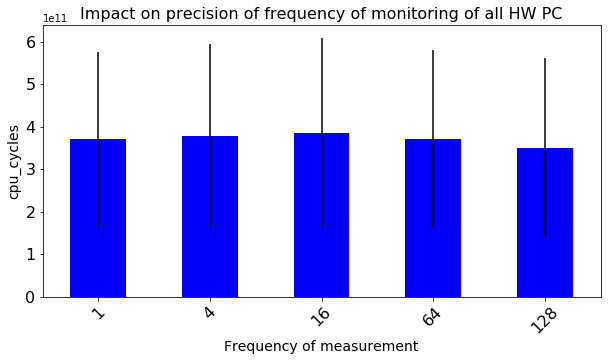

In [34]:
precision_graph(pre_hw_all[pre_hw_all.Rapl=='rapl_false'], 'cpu_cycles', 'Freq',  
      "Impact on precision of frequency of monitoring of all HW PC",
     "Frequency of measurement", "cpu_cycles")

# Comparizon HW SW

In [35]:
hw_sw = read_file("output_precision_hw_sw_", names=namelist)

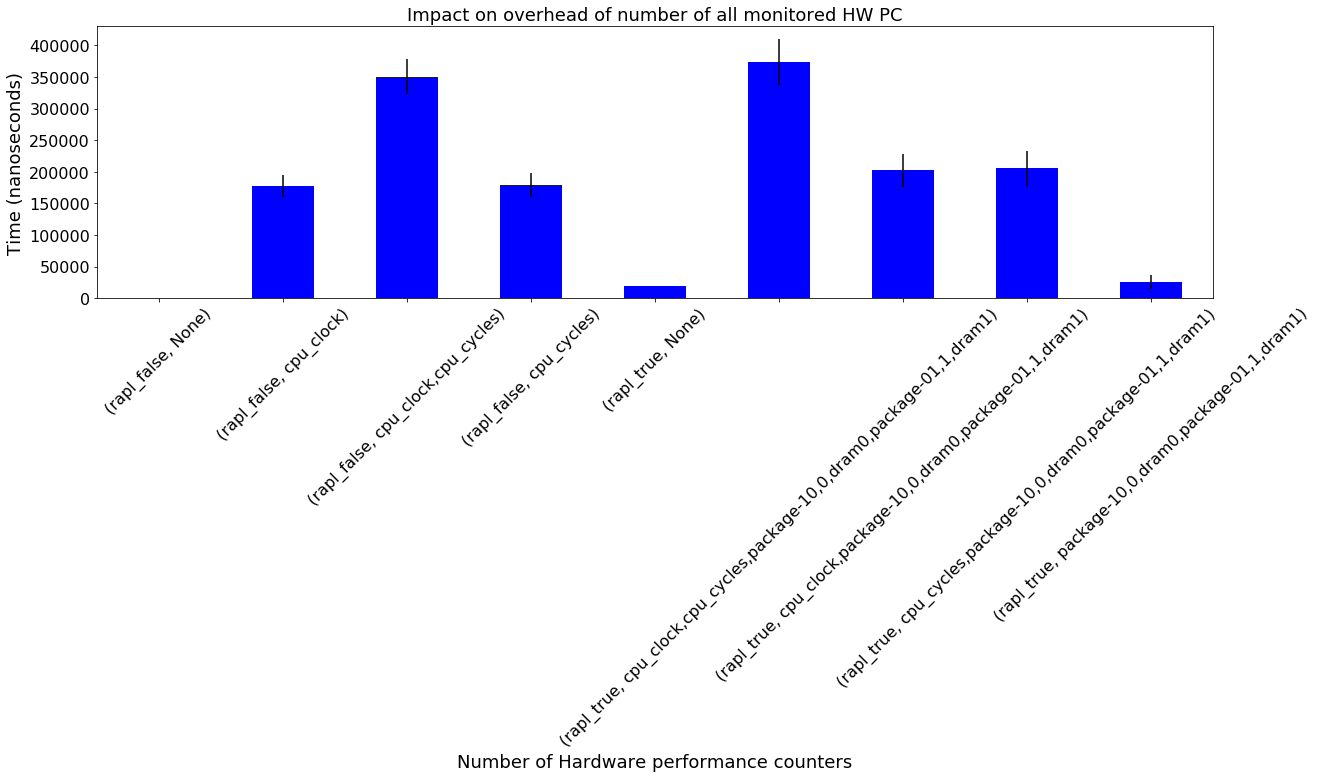

In [36]:
perf_graph(hw_sw, ['Rapl', 'Names'], 'Perf', "Impact on overhead of number of all monitored HW PC",
          "Number of Hardware performance counters", "Time (nanoseconds)")